BEST PERFORMING MOVIE ANALYSIS

Authored by Paul Gitonga Njoki

Overview

Microsoft as a company wants to start on creating original video content but do not have enough knowledge about movie creation to move forward with their plan. Using data obtained from the Box Office Mojo, Rotten Tomatoes and TheMovieDB for analysis, it helped in discovering patterns and relationships in the data in order to make better decisions and recommendations that Microsoft will use in order for them to venture into movie crteation.

DATA UNDERSTANDING

Data that is used for this task was obtained from movie websites. I chose to work with 3 data sets that is the Box Office Mojo data, Rotten Tomatoes and TheMovieDB data. After importing the necessary libraries to be used, we then read the data and understand its structrute,data contained and cleaning it before we go ahead to analyzing them to give us efficient information about movies before making conclusions.

In [57]:
#loading Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from scipy import stats
from scipy.stats import norm

Rotten Tomatoes Data

In [58]:
#reading ROTTEN TOMATOES data from the tsv file
rtmovie_df = pd.read_csv("C:/Users/hp/Documents/Moringa_project_phase_1/phase_1_project/learn-co-curriculum dsc-phase-1-project master zippedData/rt.movie_info.tsv.gz", sep='\t', header=0)
rtmovie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [59]:
#dropping unwanted columns
rtmovie_df = rtmovie_df.drop(rtmovie_df.columns[0], axis='columns')

In [60]:
rtmovie_df.shape

(1560, 11)

In [61]:
#checking the columns in the dataframe

rtmovie_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [62]:
#getting the summary of rotten tomatoes dataframe

rtmovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 134.2+ KB


In [63]:
# Checking for null values

rtmovie_df.isnull().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [64]:
# obtaining counts for each value in genre column#

rtmovie_df['genre'].value_counts()

genre
Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness       

In [65]:
#obtaing descriptive statistics for the genre column to determine the top genre
rtmovie_df['genre'].describe()

count      1552
unique      299
top       Drama
freq        151
Name: genre, dtype: object

Data for Box Office Mojo

In [66]:
#calling the box office mojo data from the  csv file
#checking the first 5 elements of the dataframe

mojo_df = pd.read_csv("learn-co-curriculum dsc-phase-1-project master zippedData/bom.movie_gross.csv.gz")
mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [67]:
#obtaining coloumns in the dataframe

mojo_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [68]:
#obtainning number of columns androws
mojo_df.shape

(3387, 5)

In [69]:
#getting data types per column

mojo_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [70]:
# getting total number of NaN values in the dataset

mojo_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [71]:
#checking the summary of the mojo dataframe

mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [72]:
# top studios

top10 = mojo_df['studio'].value_counts().head()
top10

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
Name: count, dtype: int64

In [73]:
type(top10)

pandas.core.series.Series

In [74]:
mojo_df.groupby(['studio']).sum()

,title,domestic_gross,foreign_gross,year
studio,,,,
3D,Sea Rex 3D: Journey to a Prehistoric World,6100000.0,9900000,2010
A23,Revenge of the Electric CarRed Obsession,164200.0,0,4024
A24,Spring BreakersThe Bling RingThe Spectacular N...,324194200.0,1760000013300000630000028000002400000210000011...,98754
ADC,A Royal Night OutAbsolutely Anything,248200.0,0,4032
AF,BarbaraSister (2012)Caesar Must DieOmarBethleh...,2142900.0,3100000400000,12080
...,...,...,...,...
XL,Storm Surfers 3DJimi: All Is By My Side,458000.0,0,4027
YFG,Papa: Hemingway in Cuba,1100000.0,0,2016
Yash,Band Baaja BaaraatBadmaash CompanyMere Brother...,31631400.0,6070064400800000008110000025900000818000003900000,28194


In [75]:
#descriptive statistics for each column 

mojo_df['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [76]:
#checking the years we'll be working with
mojo_df.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

The Numbers DATA

In [77]:
#calling the The Numbers data from the  csv file
#checking the first 5 elements of the dataframe

tn_df = pd.read_csv("learn-co-curriculum dsc-phase-1-project master zippedData/tn.movie_budgets.csv.gz")
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [78]:
#obtaining coloumns in the dataframe

tn_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [79]:
#obtainning number of columns androws
tn_df.shape

(5782, 6)

In [80]:
#getting data types per column

tn_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [81]:
# getting total number of NaN values in the dataset

tn_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [82]:
#checking the summary of the mojo dataframe

tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [83]:
# Checking for null values

tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [84]:
#descriptive statistics for each column 

tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [85]:
#previewing the df
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [86]:
#changing the release dates to datetime objects 
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df['release_month'] = (tn_df['release_date']).dt.month
tn_df.head

<bound method NDFrame.head of       id release_date                                        movie   
0      1   2009-12-18                                       Avatar  \
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  release_month  
0         $425,000,000   $760,507,625  $2,776,345,279     

DATA PREPARATION

I prepared the data for analysis by performing data preparation, which included data cleaning, after deciding the preferred data sets to employ.

We will perform the following after data cleaning:

    1.  Inspect for and remove any unnecessary columns.
    2.  Standardization, column renaming, and data type conversion were required. Upper case values were to be changed to lower case values.
    3.  Verify any null values and remove them.
    4.  Search for missing values, then take appropriate action.
    5.  Check for duplicate values and remove them if necessary.
Regarding the BOM Data;

In [87]:
#dropping columns in the dataframe that won't be needed during analysis

mojo_df.drop(['title'], axis=1, inplace=True)

In [88]:
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [89]:
# checking if there are any duplication
mojo_df.duplicated().value_counts()

False    3376
True       11
Name: count, dtype: int64

In [90]:
# missing values inspection
row_count = mojo_df.shape[0]
missing_count = row_count - mojo_df.count() 
missing_count

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [91]:
# duplicates check
duplicateRows = mojo_df[mojo_df.duplicated()]
duplicateRows.count()

studio            11
domestic_gross    11
foreign_gross      0
year              11
dtype: int64

In [92]:
# checking null values

mojo_df.isnull().any()

studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [93]:
# duplicates check

mojo_df.duplicated().sum()

11

For Rotten Tomatoes Data:

I started by dropping columns that i will not need in the analysis

In [94]:
rtmovie_df.columns

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [95]:
rtmovie_df

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1555,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [96]:
#total NaN values in the data set
rtmovie_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [97]:
#missing values check 
row_count = rtmovie_df.shape[0]
missing_count = row_count - rtmovie_df.count() 
missing_count

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Data Analysis

mojo_df
Analysis for top 10 studios against their domestic gross

In [98]:
#sorting the data for top to studios


mojo_dfagg = mojo_df.groupby(['studio']).agg('sum')

In [99]:
mojo_dfagg = mojo_dfagg.sort_values('domestic_gross', ascending=False).head(10)
mojo_dfagg

,domestic_gross,foreign_gross,year
studio,,,
BV,1.841903e+10,6520000006913000003910000002280000002456000001...,213451
Uni.,1.290239e+10,2916000002164000001622000007780000059800000642...,296082
WB,1.216805e+10,6643000005357000003300000001112000001013000006...,281941
Fox,1.094950e+10,3113000001855000001946000001377000001000000008...,273882
Sony,8.459683e+09,1825000001752000002107000001094000001280000001...,221575
Par.,7.685871e+09,3115000001879000001668000008100000092800000545...,203417
LGF,4.118963e+09,1714000009040000051100000481000002670000046300...,207437
WB (NL),3.995700e+09,1930000001060000005260000024200000921000001153...,90644
LG/S,2.078200e+09,5374000001613000001054000002960000027600000870...,82599


In [100]:
mojo_dfagg.index

Index(['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'LGF', 'WB (NL)', 'LG/S',
       'P/DW'],
      dtype='object', name='studio')

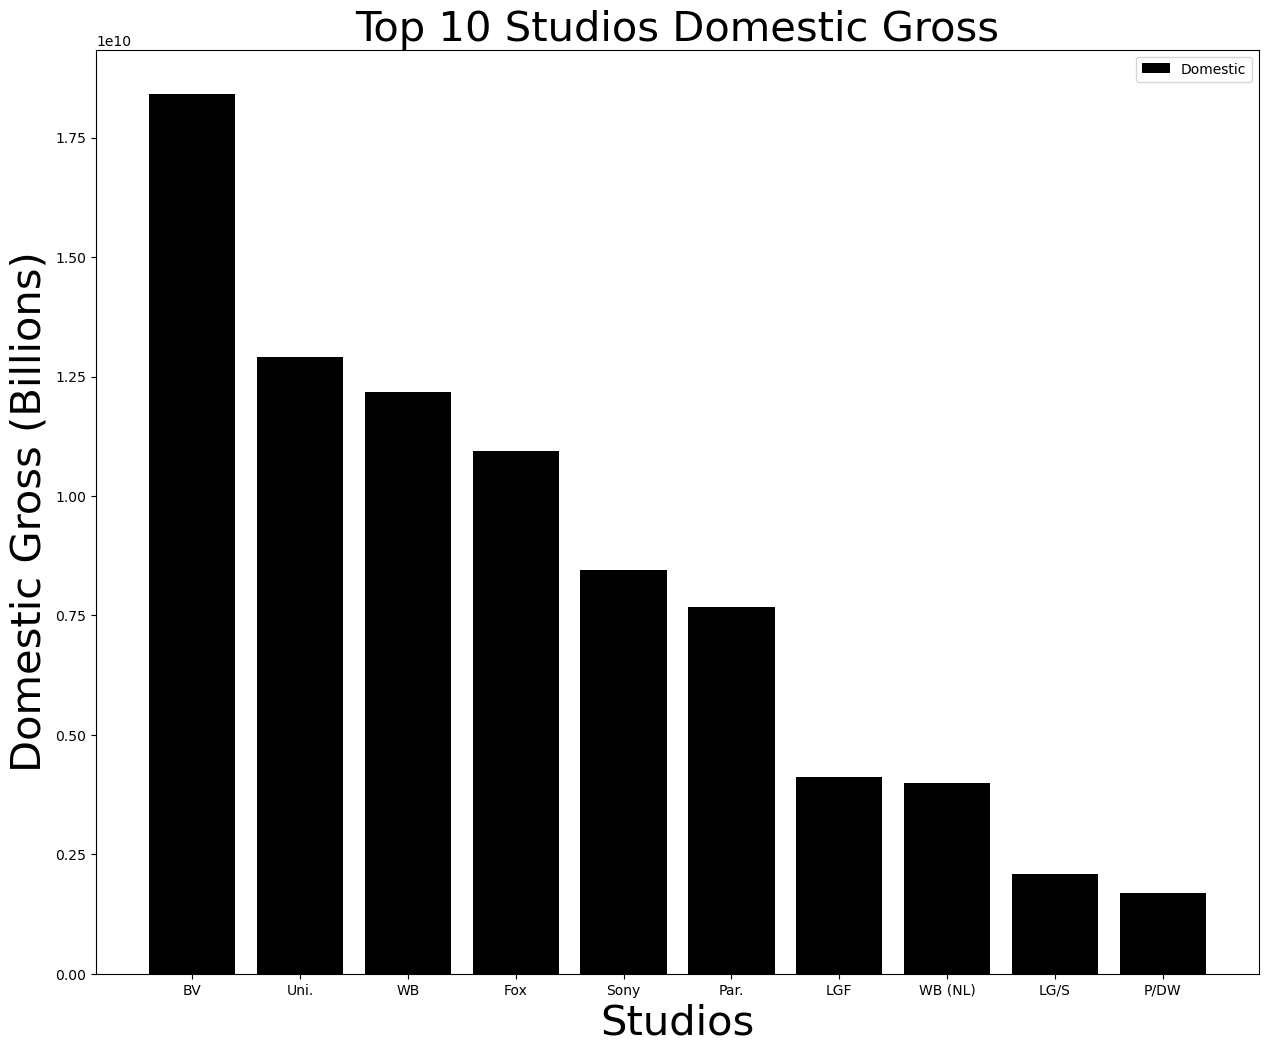

In [104]:
#bar graph plot for top 10 studios domestic gross


plt.figure(figsize=(15,12))

studios = mojo_dfagg.index
dom_gross = mojo_dfagg.domestic_gross


plt.bar(range(len(studios)), dom_gross, color='k')

plt.title('Top 10 Studios Domestic Gross', fontsize=30)
plt.xlabel('Studios', fontsize=30)
plt.ylabel('Domestic Gross (Billions)', fontsize=30)
plt.xticks(range(len(studios)), studios)

plt.legend(['Domestic'])
plt.show();

which genre of movie is produced more?

In [105]:
#as par to rtmovie_df

rtmovie_df.genre.value_counts()

genre
Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness       

Text(0.5, 1.0, 'Distribution of Genres')

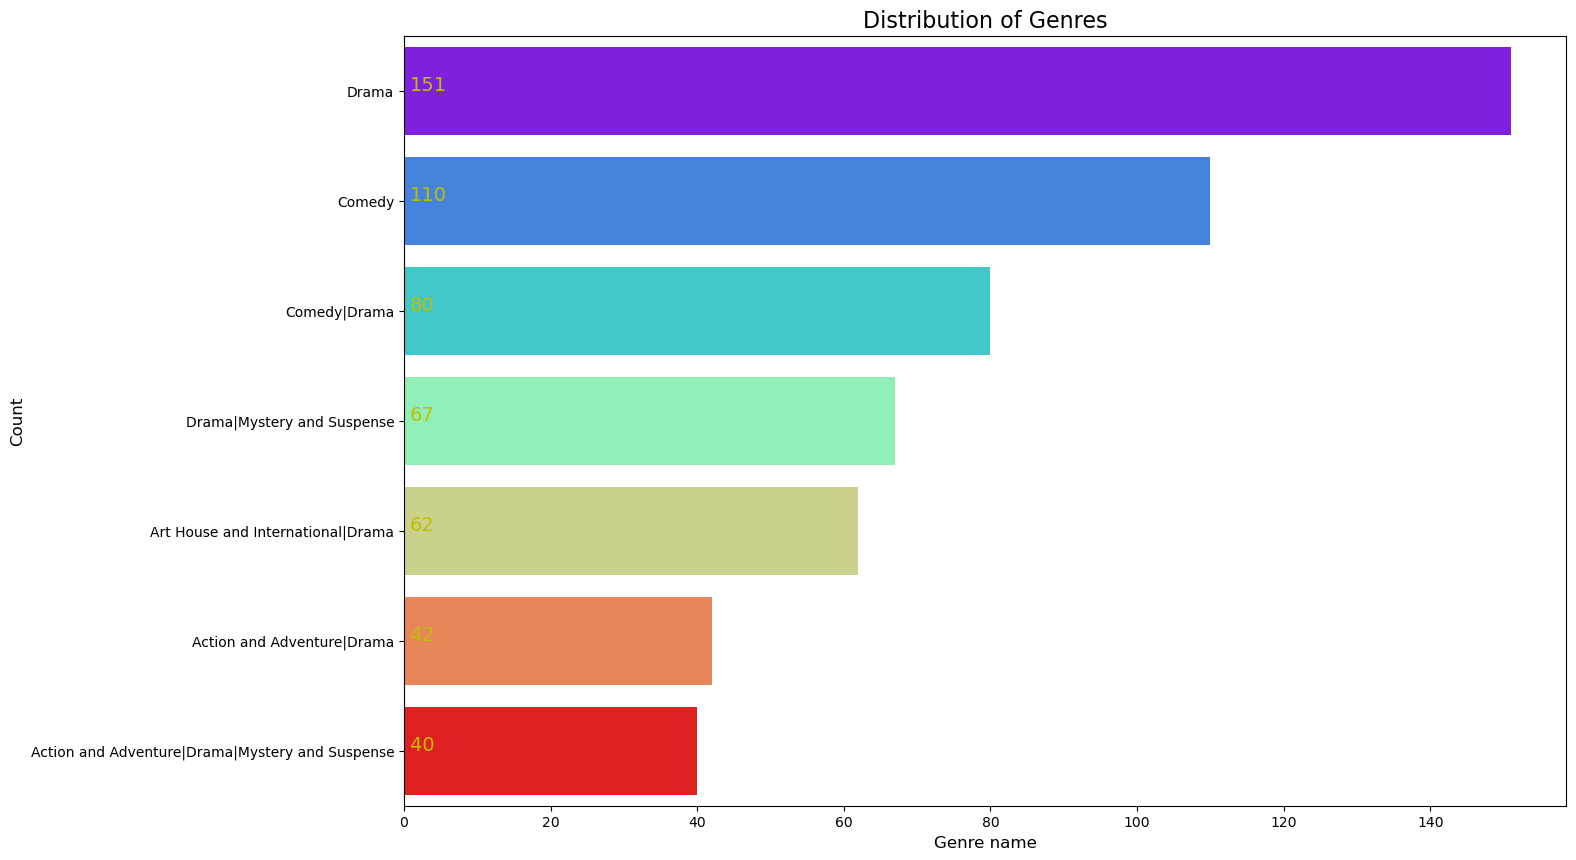

In [133]:
#Frequency of movie genres

rtmovie_df['first_genre'] = rtmovie_df['genre'].str.split(',').str[0]

a = plt.cm.cool

plt.figure(figsize=(15,10))
count = rtmovie_df['first_genre'].value_counts()[:7]
sns.barplot(x=count.values,y=count.index, palette=plt.cm.rainbow(np.linspace(0, 1, 7)))
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='y',fontsize=14)
plt.xlabel('Genre name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Distribution of Genres", fontsize=16)


By looking at the overall amount of films created in each genre, we can observe that drama films are produced more frequently than comedies, with a combination of art house and international|classics|mystery and Suspense being the least frequently produced.

In [134]:
#viewing all the unique ratings in the dataframe

rtmovie_df['rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [135]:
#checking on the total number of counts per genre:

rtmovie_df['rating'].value_counts()

rating
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: count, dtype: int64

<Axes: >

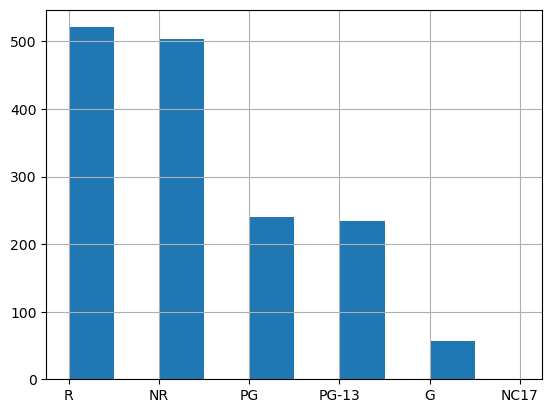

In [136]:
#visualizing this on a histogram, we'll have

rtmovie_df['rating'].hist(bins=10)

By evaluating the total number of films under each category, we deduce that films with a R rating are being produced more frequently than those with an NC17 rating.